In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
import gamedata as g

from report_config import get_config
config = get_config()
report_date = config['date']



VERBOSE = True

In [4]:
base_df = g.load_hard_sales()

### Switch2/PS5差分


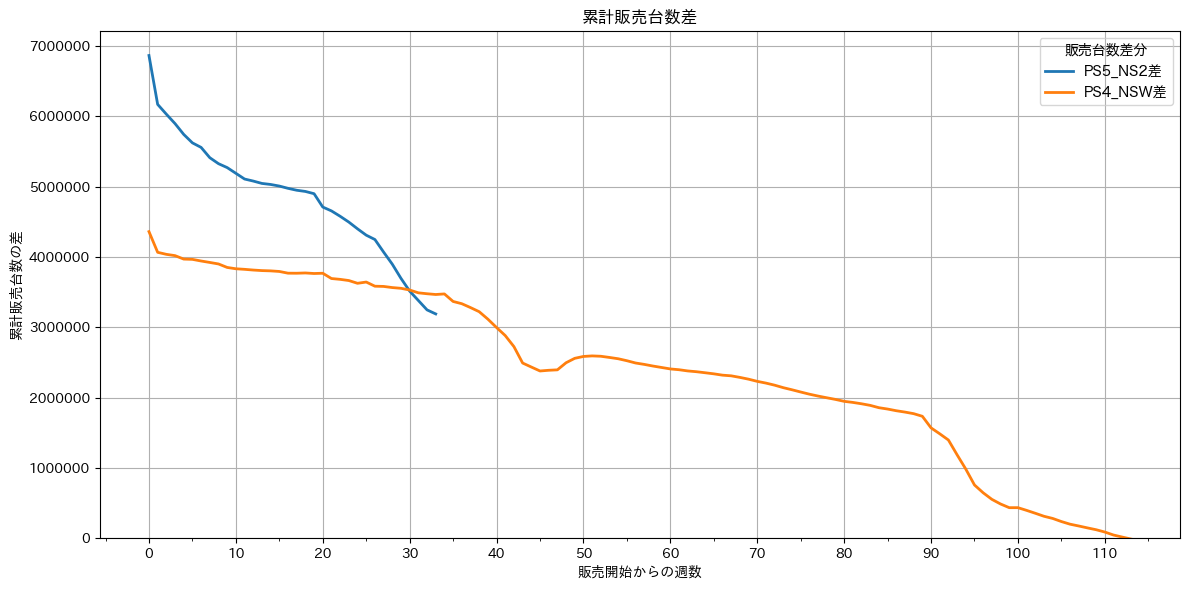

In [5]:
(fig4, diff_sw2_ps5_df) = g.plot_cumsum_diffs(cmplist = [('NS2', 'PS5'), ('NSW', 'PS4')], xgrid=10)


現時点でSwitch2の累計378万台､PS5の累計は729万台です｡Switch2とPS5の差は351万台｡
30週間で､PS5に追いつく道筋の半分を超えました｡


In [8]:
if VERBOSE:
    diff_style = g.style_sales(diff_sw2_ps5_df.iloc[28:32, :])
    display(diff_style)

hw,PS5_NS2差,PS4_NSW差
28,"3,896,894","3,564,291"
29,"3,695,168","3,553,765"
30,"3,514,143","3,529,438"
31,"3,380,600","3,489,502"


### PS5値下げ効果をPS4と比較で可視化

Switch2対抗として語られることもあるPS5DE日本語版の値下げですが､その面での効果は特にありませんでした｡
しかし､PS4との推移比較では重要な効果を発揮していることが分かります｡

以下は､PS4とPS5のそれぞれの発売からの累計台数の推移をプロットしたものです｡横軸は週(Week)です｡

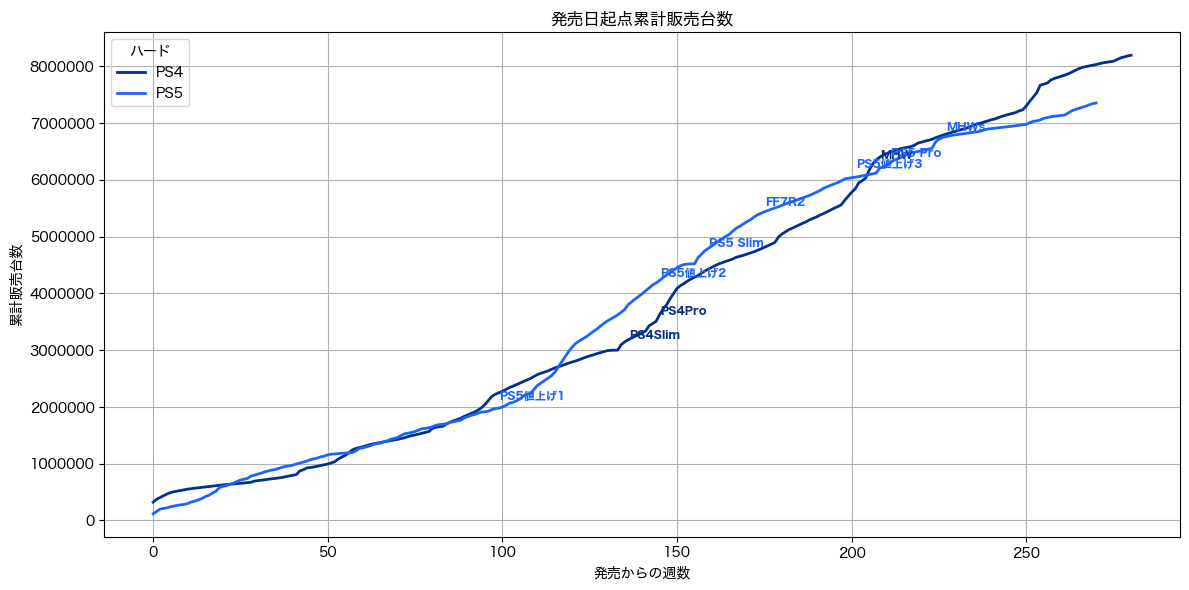

In [9]:
ps45_event_mask = g.EventMasks(hard=1.5, soft=1, event=1, price=1, sale=0)
(csd_ps45_fig, csd_ps45_df) = g.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], end=280, event_mask=ps45_event_mask)

100週まではPS4,PS5は同等ですが､120週目あたりからPS5が加速しPS4を上回ります｡
しかし､200週を超えた辺りで逆転します｡MHWs効果で225週目でPS5はPS4に追いつきそうになりますが､
その後のPS5はPS4に遅れを取り､差はどんどん広がっていきます｡

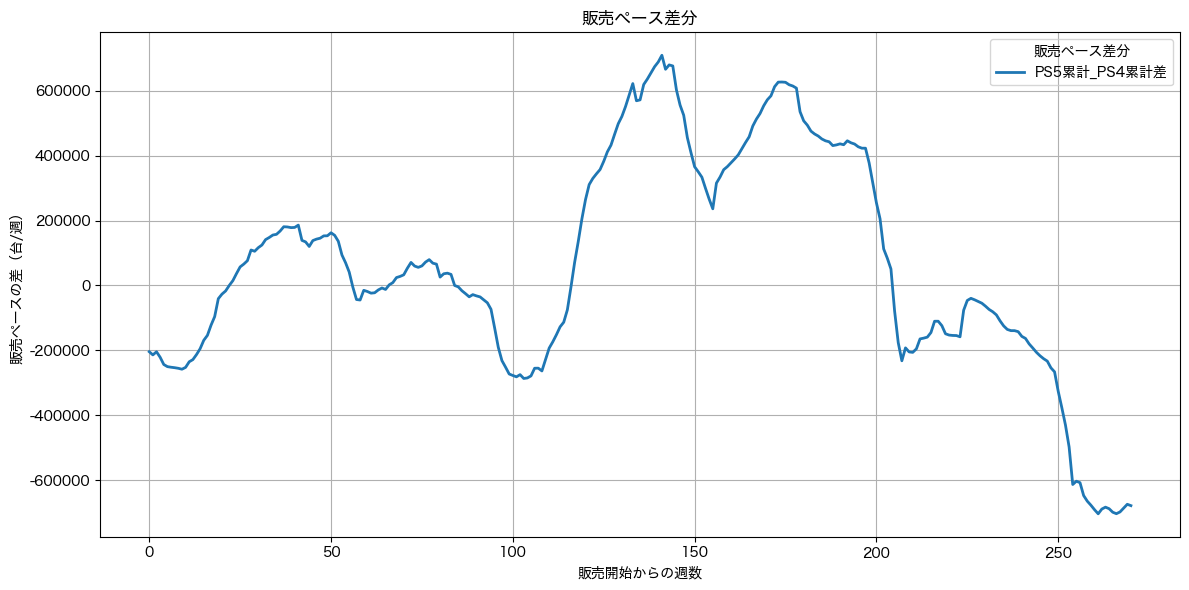

In [10]:
(fig_ps4_ps5_diff, df_ps4_ps5_diff) = g.plot_sales_pase_diff('PS4', 'PS5')



225週目､MHWs効果で一旦0に近づきますが､その後は急降下しています｡
これはMHWs以降のPS5がPS4に比べて極めて不調であったことを示します｡
(大作ソフト発売後に絶不調になるのはソニーにとっても予想困難だったでしょう)

この急降下を止めたのが **PS5DE日本語版の値下げ** です｡

PS5とPS4の差は値下げ版発売週直前の2025/11/16に最低値の-703,092台を記録した後､
値下げとブラックフライデー効果により､-682,674まで持ち直しました｡
2026/1/11集計でも -673,797 で､値下げ前の最悪値から持ち直しています｡

つまり､PS5DE日本語版の値下げにより､**同時期のPS4と同程度のペース** になりつつあります｡

In [11]:
ps4_ps5_10 = df_ps4_ps5_diff.tail(10)
ps4_ps5_10 = ps4_ps5_10.rename(columns={'ps4_report_date': 'PS4集計週', 'ps5_report_date': 'PS5集計週'})
s5 = g.style_sales(ps4_ps5_10, columns=['PS5累計_PS4累計差'], date_columns=["PS4集計週", "PS5集計週"], gradients=['PS5累計_PS4累計差'])
display(s5)

,PS5累計_PS4累計差,PS4集計週,PS5集計週
261,"-703,092",2019-02-24,2025-11-16
262,"-688,511",2019-03-03,2025-11-23
263,"-682,674",2019-03-10,2025-11-30
264,"-687,382",2019-03-17,2025-12-07
265,"-698,216",2019-03-24,2025-12-14
266,"-702,772",2019-03-31,2025-12-21
267,"-697,394",2019-04-07,2025-12-28
268,"-685,811",2019-04-14,2026-01-04
269,"-673,797",2019-04-21,2026-01-11
270,"-677,981",2019-04-28,2026-01-18


これが一時的な効果なのか､2026年を通じて効果があるのかに注目です｡

In [13]:
monthly_maker_2017_df = g.monthly_sales(base_df, begin=datetime(2017,1,1), end=datetime(2017,12,31), maker_mode=True)
monthly_maker_nintendo_2017_df = monthly_maker_2017_df[monthly_maker_2017_df['maker_name'] == 'Nintendo']

monthly_maker_2025_df = g.monthly_sales(base_df, begin=datetime(2025,1,1), end=datetime(2025,12,31), maker_mode=True)
monthly_maker_nintendo_2025_df = monthly_maker_2025_df[monthly_maker_2025_df['maker_name'] == 'Nintendo']

monthly_maker_nintendo_2017_df

,year,month,maker_name,monthly_units,sum_units
1,2017,1,Nintendo,365952,365952
4,2017,2,Nintendo,118107,484059
7,2017,3,Nintendo,685919,1169978
10,2017,4,Nintendo,366839,1536817
13,2017,5,Nintendo,191787,1728604
16,2017,6,Nintendo,179466,1908070
19,2017,7,Nintendo,522608,2430678
22,2017,8,Nintendo,431388,2862066
25,2017,9,Nintendo,256183,3118249
28,2017,10,Nintendo,403296,3521545


In [14]:
monthly_maker_nintendo_2025_df

,year,month,maker_name,monthly_units,sum_units
1,2025,1,Nintendo,260447,260447
4,2025,2,Nintendo,167188,427635
7,2025,3,Nintendo,171921,599556
10,2025,4,Nintendo,113513,713069
13,2025,5,Nintendo,106506,819575
16,2025,6,Nintendo,1247781,2067356
19,2025,7,Nintendo,502238,2569594
22,2025,8,Nintendo,414207,2983801
25,2025,9,Nintendo,258488,3242289
28,2025,10,Nintendo,454479,3696768


### 週販推移(拡大）

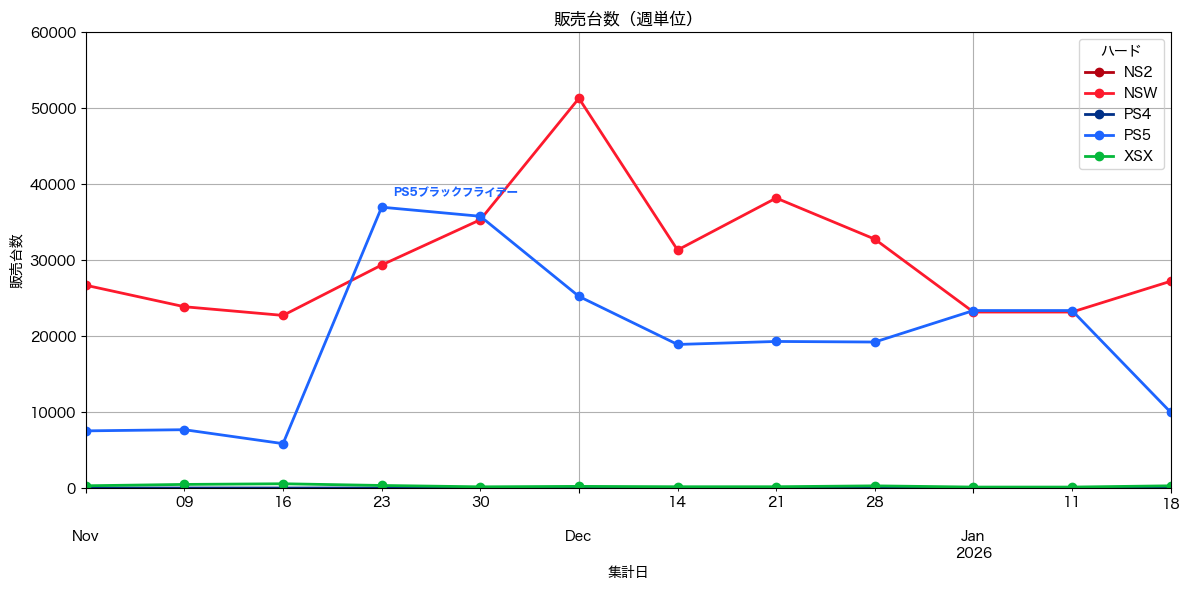

In [19]:
(weekly_big_fig, weekly_big_df) = g.plot_sales(begin=datetime(2025,11,1), end=report_date, ymax=60000, event_mask=g.EVENT_MASK_MIDDLE)